In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
# highly dependent on specific output format from data.sh
# not at all flexible 
def parsedata(filename):
    
    # create list of tuple w/ coordinates for graph
    f = open(filename, "r")
    scale_vs_itercount, scale_vs_exectime = [], []
    p1, p2 = [0.0, 0.0], [0.0, 0.0]
    for line in f.readlines():
        line = line.split()
        if line[0] == "SCALE:":         # scale 
            p1[0] = float(line[1])
            p2[0] = float(line[1])
        if line[0].isnumeric():        # iteration count
            p2[1] = float(line[0])
        if line[0] == "Average":       # average execution time
            p1[1] = float(line[2])
            scale_vs_exectime.append(tuple(p1))
            scale_vs_itercount.append(tuple(p2))
    
    f.close()
    return scale_vs_exectime, scale_vs_itercount

In [3]:
def graph(gs_et, gs_i, jc_et, jc_i):
    # decompose into x and y coordinates
    gsetX = [p[0] for p in gs_et]
    gsetY = [p[1] for p in gs_et]
    jcetX = [p[0] for p in jc_et]
    jcetY = [p[1] for p in jc_et]
    gsiX = [p[0] for p in gs_i]
    gsiY = [p[1] for p in gs_i]
    jciX = [p[0] for p in jc_i]
    jciY = [p[1] for p in jc_i]
    
    
    # two graphs, add scatter plots
    figure, axis = plt.subplots(1, 2)
    axis[0].scatter(gsetX, gsetY)
    axis[0].scatter(jcetX, jcetY)
    axis[0].set_title("Scale vs. Avg. Exec. Time")
    axis[1].scatter(gsiX, gsiY)
    axis[1].scatter(jciX, jciY)
    axis[1].set_title("Scale vs. Iteration Count")
    

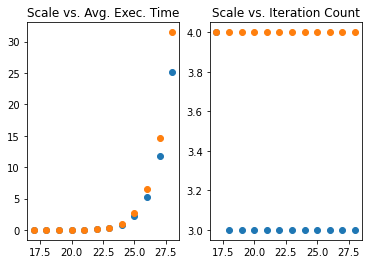

In [7]:
def main():
    
    # pass output text from data.sh script to parsedata()
    #gs_et, gs_i = parsedata("output/run.sh-results/GS-kron-24.out")
    #jc_et, jc_i = parsedata("output/run.sh-results/J-kron-24.out")
    gs_et, gs_i = parsedata("output/run.sh-results/GS-urand-24.out")
    jc_et, jc_i = parsedata("output/run.sh-results/J-urand-24.out")
    
    # pass data to graph() function
    graph(gs_et, gs_i, jc_et, jc_i)

    
if __name__ == "__main__":
    main()